<a href="https://colab.research.google.com/github/ristars03/Analisis_Sentimen_BCF/blob/main/Analisis_Sentimen_BCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# üìä Implementasi Systen Analisis Sentimen Partnership Awards - Studi Kasus BCF


In [1]:
# üîß Install Library
!pip install numpy pandas matplotlib seaborn scikit-learn nltk tensorflow openpyxl

In [2]:
#Download file FastText Indo (cc.id.300.vec)

!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz
!gunzip cc.id.300.vec.gz  # hasil akhir: cc.id.300.vec

--2025-06-23 12:28:50--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.165.160.70, 3.165.160.120, 3.165.160.106, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.165.160.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1227018698 (1.1G) [binary/octet-stream]
Saving to: ‚Äòcc.id.300.vec.gz‚Äô

cc.id.300.vec.gz    100%[===================>]   1.14G  14.0MB/s    in 14s     

2025-06-23 12:29:04 (84.9 MB/s) - ‚Äòcc.id.300.vec.gz‚Äô saved [1227018698/1227018698]



In [3]:
# üìö Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# üìÇ Upload & Load Dataset
from google.colab import files
uploaded = files.upload()
data = pd.read_csv(next(iter(uploaded)))
data = data.dropna(subset=['Penilaian_Stakeholder', 'Label_Sentimen'])
data.head()

Saving NEW_FIXED_1000_DATASET_PARTNERSHIP_AWARDS.csv to NEW_FIXED_1000_DATASET_PARTNERSHIP_AWARDS (1).csv


No.                           Kategori  \
0    1  The Most Applicants of University   
1    2  The Most Applicants of University   
2    3  The Most Applicants of University   
3    4  The Most Applicants of University   
4    5  The Most Applicants of University   

                                           Deskripsi  \
0  Universitas dengan pendaftar terbanyak di prog...   
1  Universitas dengan pendaftar terbanyak di prog...   
2  Universitas dengan pendaftar terbanyak di prog...   
3  Universitas dengan pendaftar terbanyak di prog...   
4  Universitas dengan pendaftar terbanyak di prog...   

                                           Indikator  \
0  Jumlah mahasiswa dari universitas terkait yang...   
1  Jumlah mahasiswa dari universitas terkait yang...   
2  Jumlah mahasiswa dari universitas terkait yang...   
3  Jumlah mahasiswa dari universitas terkait yang...   
4  Jumlah mahasiswa dari universitas terkait yang...   

                          Mitra  \
0  Universitas Negeri Semarang    
1        Universitas Brawijaya    
2        Universitas Sriwijaya    
3   Universitas Sumatera Utara    
4           Universitas Bakrie    

                               Penilaian_Stakeholder Label_Sentimen  
0  Terdapat 1286 Mahasiswa pendaftar, Universitas...        positif  
1  Terdapat 1274 Mahasiswa pendaftar, Universitas...        positif  
2  Terdapat 1146 Mahasiswa pendaftar, Universitas...        positif  
3  Jumlah pendaftar dari USU cukup stabil, namun ...         netral  
4  Sebagai universitas mitra, Bakrie menunjukkan ...         netral

In [6]:
# üßπ Preprocessing Teks & Label
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

def normalize_label(label):
    label = str(label).strip().lower()
    if 'positif' in label:
        return 'positif'
    elif 'netral' in label:
        return 'netral'
    elif 'negatif' in label:
        return 'negatif'
    return None

data['Label_Sentimen'] = data['Label_Sentimen'].apply(normalize_label)
data = data.dropna(subset=['Label_Sentimen'])
data['cleaned_text'] = data['Penilaian_Stakeholder'].apply(clean_text)
data[['cleaned_text', 'Label_Sentimen']].head(10)

cleaned_text Label_Sentimen
0  mahasiswa pendaftar universita negeri semarang...        positif
1  mahasiswa pendaftar universita brawijaya menem...        positif
2  mahasiswa pendaftar universita sriwijaya menca...        positif
3  pendaftar usu stabil ditingkatkan partisipasi ...         netral
4  universita mitra bakri partisipasi pendaftar l...         netral
5  memiliki mahasiswa pendaftar unpad ekspektasi ...        negatif
6  pendaftar unair tergolong rendah diband univer...        negatif
7  pendaftar ui merata fakulta tertinggi kontribu...         netral
8  unj minat mahasiswa stabil program pendaftar k...         netral
9  pendaftar relatif rendah bidang vokasi relevan...        negatif

In [7]:
# üî† Encoding Label
encoder = LabelEncoder()
data['encoded_label'] = encoder.fit_transform(data['Label_Sentimen'])
X = data['cleaned_text']
y = data['encoded_label'].astype('int32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Kelas:", encoder.classes_)

Kelas: ['negatif' 'netral' 'positif']


In [8]:
# üìé Tokenisasi dan Padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
maxlen = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')

#Load vector FastText & buat matriks embedding
embedding_index = {}
with open('cc.id.300.vec', encoding='utf-8') as f:
    next(f)  # skip header
    for line in f:
        values = line.rstrip().split(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

print(f"Jumlah kata dalam FastText: {len(embedding_index)}")

#Buat embedding matrix untuk tokenizer
embedding_dim = 300
word_index = tokenizer.word_index
num_words = min(5000, len(word_index) + 1)

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


Jumlah kata dalam FastText: 2000000


In [10]:
# üìå MODEL

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional


model = Sequential([
    Embedding(input_dim=num_words,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              trainable=True),
    Bidirectional(LSTM(128)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ embedding_1 (Embedding)         ‚îÇ ?                      ‚îÇ       314,400 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_1 (Bidirectional) ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ ?                      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ ?                      ‚îÇ   0 (unbuilt) ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 314,400 (1.20 MB)

 Trainable params: 314,400 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# üîÅ Training Model

history = model.fit(
    X_train_pad,
    y_train,
    epochs=25,
    validation_data=(X_test_pad, y_test),
    batch_size=32
)


Epoch 1/25
26/26 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 423ms/step - accuracy: 0.3580 - loss: 1.0999 - val_accuracy: 0.3941 - val_loss: 1.0847
Epoch 2/25
26/26 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 540ms/step - accuracy: 0.4674 - loss: 1.0587 - val_accuracy: 0.4877 - val_loss: 1.0166
Epoch 3/25
26/26 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 514ms/step - accuracy: 0.5962 - loss: 0.8700 - val_accuracy: 0.6108 - val_loss: 0.9307
Epoch 4/25
26/26 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 437ms/step - accuracy: 0.7696 - loss: 0.5602 - val_accuracy: 0.6355 - val_loss: 0.9774
Epoch 5/25
26/26 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23s 536ms/step - accuracy: 0.8971 - loss: 0.2908 - val_accuracy: 0.6552 - val_loss: 1.2646
Epoch 6/25
26/26 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 410ms/step - accuracy: 0.9410 - loss: 0.1743 - val_accuracy: 0.6059 - val

In [12]:
# üîç Prediksi dan Evaluasi
from sklearn.metrics import classification_report

y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)

print("Classification Report (BiLSTM):")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 158ms/step
Classification Report (BiLSTM):
              precision    recall  f1-score   support

     negatif       0.55      0.59      0.57        63
      netral       0.58      0.57      0.58        63
     positif       0.58      0.56      0.57        77

    accuracy                           0.57       203
   macro avg       0.57      0.57      0.57       203
weighted avg       0.57      0.57      0.57       203



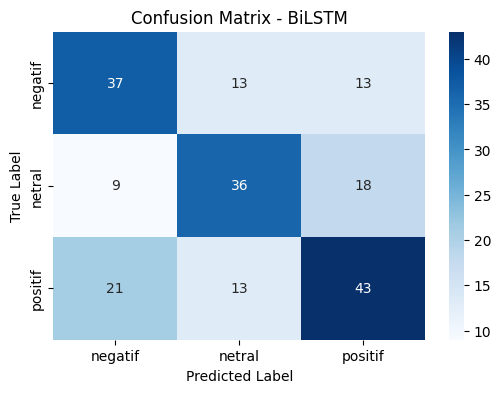

In [13]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - BiLSTM")
plt.show()


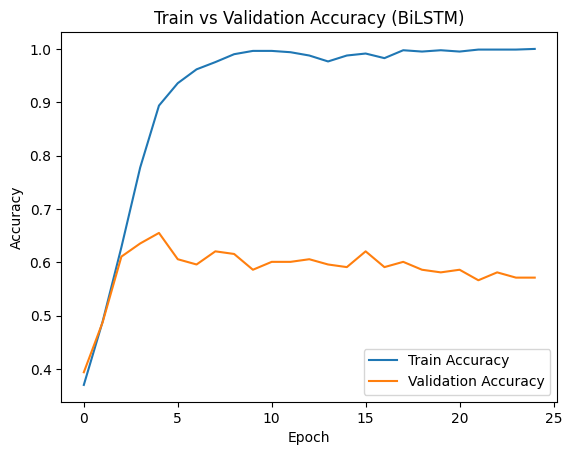

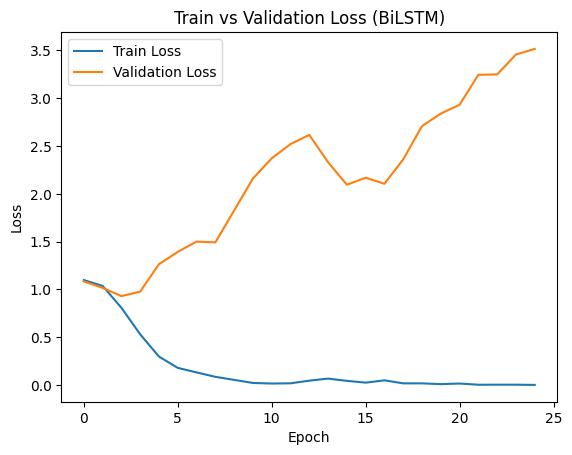

In [14]:
# Plot Akurasi

# Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy (BiLSTM)')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss (BiLSTM)')
plt.legend()
plt.show()


üë©‚Äçüíª DEMO SISTEM üë©‚Äçüíª

In [15]:
# Demo kalimat penilaian baru
penilaian_baru = [
    "Mitra sangat membantu dan aktif mendampingi mahasiswa.",
    "Tidak ada komunikasi dari pihak mitra selama kegiatan.",
    "Kinerjanya baik namun masih bisa ditingkatkan.",
    "Responsif dan profesional sepanjang program.",
    "Terjadi miskomunikasi yang menghambat proses.",
    "Mitra menerima masukan dengan terbuka.",
    "Kurang koordinasi saat implementasi program.",
    "Memberikan kontribusi nyata dalam pengembangan mahasiswa.",
    "Minim inisiatif dan kurang dukungan.",
    "Kerja sama sangat memuaskan dan lancar."
]

# Processing & Padding
penilaian_clean = [clean_text(k) for k in penilaian_baru]
penilaian_seq = tokenizer.texts_to_sequences(penilaian_clean)
penilaian_pad = pad_sequences(penilaian_seq, maxlen=maxlen, padding='post')

# Prediksi probabilitas dan label akhir
pred_prob = model.predict(penilaian_pad)
pred_label = np.argmax(pred_prob, axis=1)
pred_kelas = encoder.inverse_transform(pred_label)

# Tampilkan hanya label dan persentase confidence tertinggi
for i, (kalimat, probs) in enumerate(zip(penilaian_baru, pred_prob)):
    label_idx = np.argmax(probs)
    label = encoder.classes_[label_idx]
    confidence = probs[label_idx] * 100
    print(f"{i+1}. \"{kalimat}\" ‚Üí {label} {confidence:.2f}%")




1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 83ms/step
1. "Mitra sangat membantu dan aktif mendampingi mahasiswa." ‚Üí positif 100.00%
2. "Tidak ada komunikasi dari pihak mitra selama kegiatan." ‚Üí positif 99.00%
3. "Kinerjanya baik namun masih bisa ditingkatkan." ‚Üí netral 99.99%
4. "Responsif dan profesional sepanjang program." ‚Üí positif 100.00%
5. "Terjadi miskomunikasi yang menghambat proses." ‚Üí negatif 99.29%
6. "Mitra menerima masukan dengan terbuka." ‚Üí netral 99.98%
7. "Kurang koordinasi saat implementasi program." ‚Üí netral 73.23%
8. "Memberikan kontribusi nyata dalam pengembangan mahasiswa." ‚Üí negatif 99.99%
9. "Minim inisiatif dan kurang dukungan." ‚Üí negatif 99.82%
10. "Kerja sama sangat memuaskan dan lancar." ‚Üí positif 99.36%
